## Frequentist
- A sample is viewed as a randomly selected subset of a larger (potentially hypothetical) population
- Long run frequency statements are made about the larger population
- take an example of N flips of a coin, N is the sample (potential population is the entire set of possible flips)
- Each flip follows a Bernoulli distribution with Probability of 1 == p
- appealing to Central Limit Theorem, you can assume the long run behaviour follows a normal distribution (all properties of normal will follow)
- Remember, for N bernoulli trials, the distrubtion will be Binomial. So apply this PMF.
- https://math.mit.edu/~rmd/650/binomconfints.pdf for estimating p
- http://dept.stat.lsa.umich.edu/~kshedden/Courses/Stat485/Notes/binomial_confidence_intervals.pdf

### interpreting Confidence intervals
- if we repeat an experiment infinitely many times, then 95%(or whatever you choose) of the confidence intervals constructed will contain the correct estimated value of P
- notice how this is not the intuitive way to think about it, normally someone would think it means "95%" confident your estimated value of P is contained within the upper and lower bound...
- So what is the probability that P is in any given interval? According to frequentist approach, it either is or is not (assuming that there is some sort of certainty, and the only uncertainty we have comes from sampling variance!!!!)

## Likelihood

- Y follows beta distribution $$Y_i\sim B(\theta)$$
- probability that y equals one $$P(Y_i = 1) = \theta$$
- probability Y equals something given theta $$P(Y = y|\theta) = P(Y_1 = y_1 ... Y_n = y_n|\theta)$$
- Broken up by the product rule assuming iid 
$${\displaystyle \prod_{i=1}^{n} P(Y_i = y_i | \theta)} = {\displaystyle \prod_{i=1}^{n} \theta^{y_i} (1-\theta)^{(1-y_i)} }
 $$
- Can be thought of as a likelihood function, ie: we reverse theta and y, now we say "given Y, whats the value of theta that makes Y most plausible. The MLE takes the argmax of the likelihood function. We also log the likelihood because its easier to work without the product notation.
$$ MLE: \boldsymbol{\hat{\theta}} = argmax L(\theta|y_i)$$
- for the binomial case it is:
$$ = (\sum y_i)log(\theta) + (\sum (1-y_i))log(1-\theta)$$
- which equals
$$ = (y)log(\theta) + (\sum (N-y))log(1-\theta)$$
- Compute the MLE by setting the derivative of the log likelihood equal to zero, then solve for theta. Or use numerical methods like newton raphson.
$$\boldsymbol{\hat{\theta}}$$ is the value for $$\theta$$ which maximizes the likelihood function.

- https://newonlinecourses.science.psu.edu/stat504/node/28/
- https://wolfweb.unr.edu/~zal/STAT653_Fall12/HW2_sol.pdf
- https://stats.stackexchange.com/questions/181035/how-to-derive-the-likelihood-function-for-binomial-distribution-for-parameter-es

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

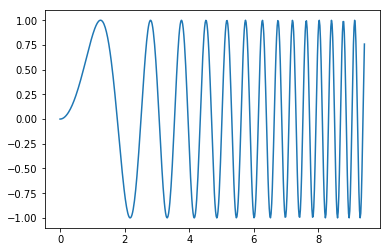

In [2]:
#basic plotting
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))

- http://rstudio-pubs-static.s3.amazonaws.com/240670_37c5f4ada9a5402ab5474bb66514e667.html
- https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b

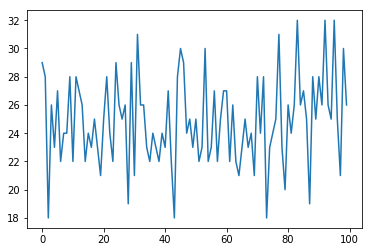

In [3]:
tests = np.random.binomial(50, 0.5, size=100)
plt.plot([x for x in range(100)], tests)

In [83]:
def binomial(n,x,theta):
    '''n: number of trials, x: number of successes, theta: parameter vals'''
    '''likelihood is a function of theta so we want to vary that'''
    return -(x*np.log(theta) + (n-x)*np.log(1-theta))

def gradient(n,x,theta):
    '''gradient of the above'''
    return -((x/theta) - ((n-x)/(1-theta)))

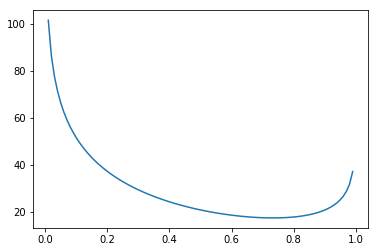

In [84]:
gimme = []
grad = []
for theta in np.arange(0.01,1,.01):
    gimme.append(binomial(30,22,theta))
    grad.append(gradient(30,22,theta))
    

plt.plot(np.arange(0.01,1,.01),gimme)

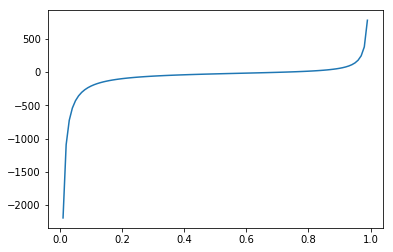

In [85]:
plt.plot(np.arange(0.01,1,.01),grad)

In [133]:
# https://towardsdatascience.com/gradient-descent-demystified-bc30b26e432a
# https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

In [153]:
def gradientDescent(n,x,theta,threshold = .0005, alpha = .001,maxiter = 100000):
    path = []
    i = 0
    while i < maxiter:
        theta_t1 = theta - alpha*gradient(n,x,theta)
        diff = np.abs(theta_t1 - theta)
        path.append(diff)
        theta = theta_t1
        i+=1
        if diff <= threshold:
            break
    return theta
    

In [154]:
gradientDescent(30,22,.10)

0.7306630202599608

In [149]:
theoretical = 22/30
theoretical

0.7333333333333333

In [150]:
gradient(30,22,theoretical)

-1.0658141036401503e-14

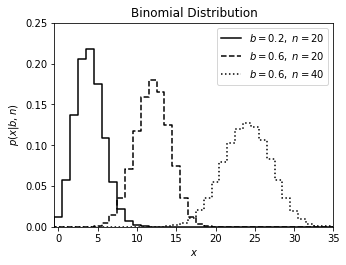

In [26]:
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt

n_values = [20, 20, 40]
b_values = [0.2, 0.6, 0.6]
linestyles = ['-', '--', ':']
x = np.arange(-1, 200)

fig, ax = plt.subplots(figsize=(5, 3.75))

for (n, b, ls) in zip(n_values, b_values, linestyles):
    # create a binomial distribution
    dist = binom(n, b)

    plt.plot(x, dist.pmf(x), color='black', linestyle='steps-mid' + ls,
             label=r'$b=%.1f,\ n=%i$' % (b, n))

plt.xlim(-0.5, 35)
plt.ylim(0, 0.25)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|b, n)$')
plt.title('Binomial Distribution')

plt.legend()
plt.show()